In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model 

import os
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [7]:
model = load_model('./model_checkpoint/best_model.h5')

In [8]:
testDir  = "/home/trojan/Desktop/dimentia/data_10slices/data_2categ/dataset_augmented/test/CN"
CATEGORIES = ['AD', 'CN']
folders_AD = ['1', '2', '3', '4', '5', '6', '7', '8']
folders_CN = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

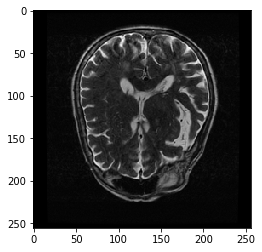

In [9]:
for folder in folders_CN:
    PATH = os.path.join(testDir, folder)
    for img in os.listdir(PATH):
        img_array = cv2.imread(os.path.join(PATH,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break 

In [10]:
def prepare(filepath):
    IMG_SIZE = 256
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    new_array = cv2.normalize(new_array , None, 0, 1, cv2.NORM_MINMAX)
    #new_array = new_array.astype('float32') / 255
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [11]:
patient = 1
AD_patient = 0
CN_patient = 0

for folder in folders_CN:
    PATH = os.path.join(testDir, folder)
    count_AD = 0
    count_CN = 0
    print('Testing for patient {}'.format(patient))
    for img in os.listdir(PATH):
        prediction = model.predict([prepare(os.path.join(PATH,img))])
        #prediction = (model.predict([prepare(os.path.join(PATH,img))])>0.5).astype("int32")
        predicted_class_indice=np.argmax(prediction,axis=-1)
        predicted_class = CATEGORIES[int(predicted_class_indice)]
        print(predicted_class_indice)
        print(prediction)
        print(predicted_class)
        if predicted_class == 'AD':
            count_AD += 1
        else:
            count_CN += 1
    
    print(f"AD votes = {count_AD}")
    print(f"CN votes = {count_CN}")
    
    if count_AD > count_CN:
        print('Patient belongs to AD')
        AD_patient += 1
    else:
        print('Patient belongs to CN')
        CN_patient += 1
    
    patient += 1
    
accuracy = (CN_patient/len(folders_CN))*100
print(f"Accuracy is {accuracy}%")
    
    
        

Testing for patient 1
[0]
[[0.7576828  0.19423036]]
AD
[1]
[[0.31270695 0.6881318 ]]
CN
[1]
[[0.1506481  0.87794536]]
CN
[0]
[[0.798128   0.20777279]]
AD
[0]
[[0.49742943 0.48305246]]
AD
[0]
[[0.8428972  0.16870105]]
AD
[0]
[[0.9795293  0.01899782]]
AD
[0]
[[0.7857319  0.18909664]]
AD
[1]
[[0.138401  0.8754165]]
CN
[0]
[[0.9346942  0.06549626]]
AD
AD votes = 7
CN votes = 3
Patient belongs to AD
Testing for patient 2
[1]
[[0.3997538  0.59615993]]
CN
[0]
[[0.7739092  0.24983804]]
AD
[0]
[[0.9228842  0.06672928]]
AD
[0]
[[0.70052475 0.31158617]]
AD
[0]
[[0.7899549  0.12188543]]
AD
[0]
[[0.7115732  0.21195416]]
AD
[0]
[[0.69284755 0.31161666]]
AD
[0]
[[0.75505716 0.20075764]]
AD
[0]
[[0.52675337 0.47508106]]
AD
[1]
[[0.42895693 0.5505579 ]]
CN
AD votes = 8
CN votes = 2
Patient belongs to AD
Testing for patient 3
[1]
[[0.10796267 0.94830334]]
CN
[0]
[[0.9586269  0.04123984]]
AD
[0]
[[0.95984733 0.0487963 ]]
AD
[1]
[[0.04094557 0.97901785]]
CN
[1]
[[0.16073813 0.86995006]]
CN
[0]
[[0.7457887